## Name: Jonathan Steen
## Final Project - Student Mental Health
## Date: 6/4/2022
## Course: DSC530 - T302

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(1, '/Users/jonsteen/Desktop/DSC 530/ThinkStats2-master')
import thinkstats2 
import thinkplot
import scipy
from scipy.stats import kurtosis
from scipy.stats import skew
import statsmodels.formula.api as sm

## Import Data

In [2]:
data = pd.read_csv('Student Mental health.csv')

In [3]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/20 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/20 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/20 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/20 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/20 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


## Clean Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [5]:
# Remove Timestamp column
data.drop(['Timestamp'], axis = 1, inplace = True)

In [6]:
# Check responses
data.nunique()

Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [7]:
# Rename columns
data_columns = {'Choose your gender':'Gender','What is your course?':'Course',
             'Your current year of Study':'Year of Study','What is your CGPA?':'CGPA',
             'Do you have Depression?':'Depression', 'Marital status':'Marital',
             'Do you have Anxiety?':'Anxiety', 'Do you have Panic attack?':'Panic Attack',
             'Did you seek any specialist for a treatment?':'Treatment'}
data.rename(columns = data_columns, inplace = True)
data.head()

,Gender,Age,Course,Year of Study,CGPA,Marital,Depression,Anxiety,Panic Attack,Treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [8]:
data.dropna(axis = 0, inplace = True)

In [9]:
# Replace variables
data.replace({'Yes':1,'No':0,'Male':1,'Female':0}, inplace = True)

In [10]:
# Replace variables
data['Year of Study'].replace(['year 1','year 2','year 3','year 4'],['Year 1','Year 2','Year 3','Year 4'], inplace = True)
data['Year of Study'].replace(['Year 1','Year 2','Year 3','Year 4'],['1','2','3','4'], inplace = True)
data['Year of Study'].unique()

array(['1', '2', '3', '4'], dtype=object)

In [11]:
# Checking unique variables
data["CGPA"].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [12]:
# Replace variables
data.replace({'3.50 - 4.00 ':'3.50 - 4.00'},regex = True, inplace = True)
data["CGPA"].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [13]:
# Replace variables
data['CGPA'].replace(['3.50 - 4.00','3.00 - 3.49',
                      '2.50 - 2.99','2.00 - 2.49','0 - 1.99'],
                     ['5','4','3','2','1'], inplace = True)

In [14]:
# Check for empty responses
data.isnull().sum()

Gender           0
Age              0
Course           0
Year of Study    0
CGPA             0
Marital          0
Depression       0
Anxiety          0
Panic Attack     0
Treatment        0
dtype: int64

In [15]:
# Convert all numbers to float
for col in ['Gender', 'Age', 'Year of Study', 'CGPA', 'Marital', 'Depression', 'Anxiety', 'Panic Attack', 'Treatment']: data[col] = data[col].astype('float64')
data.head()

,Gender,Age,Course,Year of Study,CGPA,Marital,Depression,Anxiety,Panic Attack,Treatment
0,0.0,18.0,Engineering,1.0,4.0,0.0,1.0,0.0,1.0,0.0
1,1.0,21.0,Islamic education,2.0,4.0,0.0,0.0,1.0,0.0,0.0
2,1.0,19.0,BIT,1.0,4.0,0.0,1.0,1.0,1.0,0.0
3,0.0,22.0,Laws,3.0,4.0,1.0,1.0,0.0,0.0,0.0
4,1.0,23.0,Mathemathics,4.0,4.0,0.0,0.0,0.0,0.0,0.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         100 non-null    float64
 1   Age            100 non-null    float64
 2   Course         100 non-null    object 
 3   Year of Study  100 non-null    float64
 4   CGPA           100 non-null    float64
 5   Marital        100 non-null    float64
 6   Depression     100 non-null    float64
 7   Anxiety        100 non-null    float64
 8   Panic Attack   100 non-null    float64
 9   Treatment      100 non-null    float64
dtypes: float64(9), object(1)
memory usage: 8.6+ KB


In [17]:
data_variables = data[['Gender', 'Age', 'Year of Study', 'CGPA', 'Depression', 'Anxiety', 'Treatment']]

## Data Analysis

In [18]:
data_variables.describe(include = "all")

,Gender,Age,Year of Study,CGPA,Depression,Anxiety,Treatment
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.250000,20.53000,1.980000,4.310000,0.350000,0.340000,0.060000
std,0.435194,2.49628,0.994734,0.884148,0.479372,0.476095,0.238683
min,0.000000,18.00000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,18.00000,1.000000,4.000000,0.000000,0.000000,0.000000
50%,0.000000,19.00000,2.000000,4.000000,0.000000,0.000000,0.000000
75%,0.250000,23.00000,3.000000,5.000000,1.000000,1.000000,0.000000
max,1.000000,24.00000,4.000000,5.000000,1.000000,1.000000,1.000000


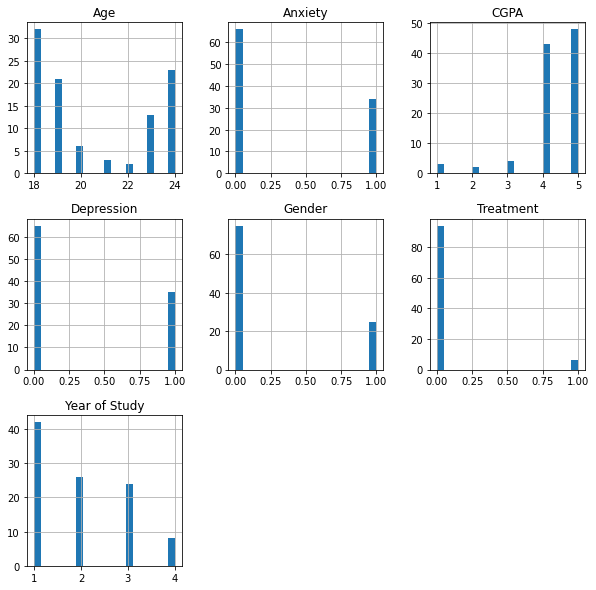

In [19]:
hist = data_variables.hist(bins = 20, figsize = (10, 10))

In [20]:
# Mode of catgorical variables
data_variables_mode = data[['Gender', 'Year of Study', 'CGPA', 'Depression', 'Anxiety', 'Treatment']].mode()
data_variables_mode

,Gender,Year of Study,CGPA,Depression,Anxiety,Treatment
0,0.0,1.0,5.0,0.0,0.0,0.0


In [21]:
# Variance of variables
data_variables_var = np.var(data_variables)
data_variables_var

Gender           0.1875
Age              6.1691
Year of Study    0.9796
CGPA             0.7739
Depression       0.2275
Anxiety          0.2244
Treatment        0.0564
dtype: float64

In [22]:
# Kurtosis
data_variables.kurtosis()

Gender           -0.638754
Age              -1.640801
Year of Study    -0.923696
CGPA              4.636445
Depression       -1.625116
Anxiety          -1.561243
Treatment        12.401350
dtype: float64

## PMF

In [23]:
treatment = data.Treatment
treatment

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
96     0.0
97     0.0
98     0.0
99     0.0
100    0.0
Name: Treatment, Length: 100, dtype: float64

In [24]:
age = data.Age
age

0      18.0
1      21.0
2      19.0
3      22.0
4      23.0
       ... 
96     21.0
97     18.0
98     19.0
99     23.0
100    20.0
Name: Age, Length: 100, dtype: float64

In [25]:
# Create groups
treatment_yes = data[data.Treatment == 1]
treatment_no = data[data.Treatment == 0]

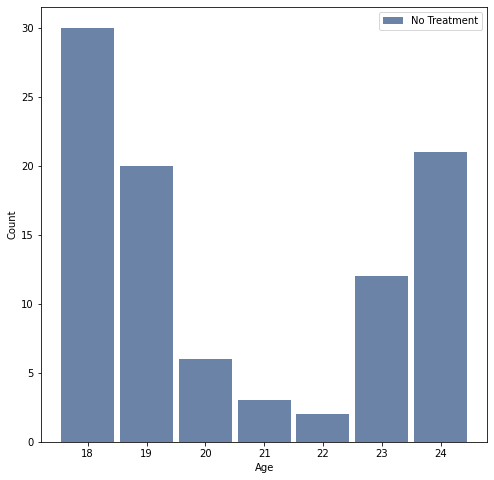

In [26]:
# Plot No Treatment
matplotlib.rc('figure', figsize = (8, 8))
notreatment_hist = thinkstats2.Hist(treatment_no.Age, label = 'No Treatment')
thinkplot.Hist(notreatment_hist)
plt.legend()
thinkplot.Config(xlabel = 'Age', ylabel = 'Count')

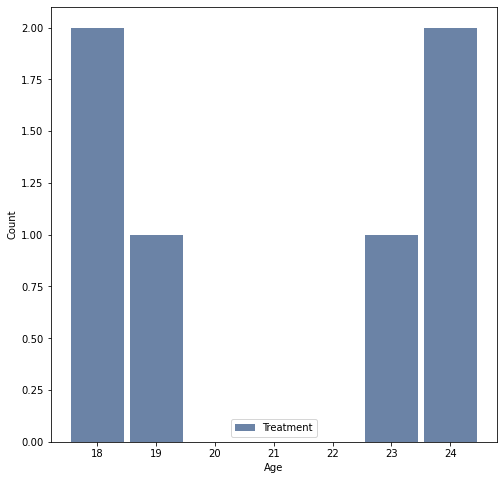

In [27]:
# Plot Treatment 
treatment_hist = thinkstats2.Hist(treatment_yes.Age, label = 'Treatment')
thinkplot.Hist(treatment_hist)
plt.legend()
thinkplot.Config(xlabel = 'Age', ylabel = 'Count')

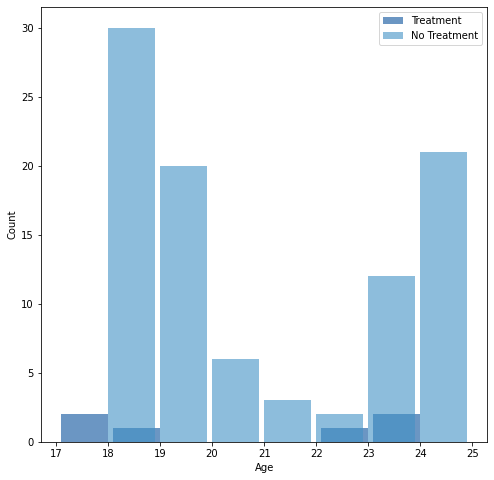

In [28]:
# Plot together.
thinkplot.PrePlot(2)
thinkplot.Hist(treatment_hist, align = 'right')
thinkplot.Hist(notreatment_hist, align = 'left')
plt.legend()
thinkplot.Config(xlabel = 'Age', ylabel = 'Count')

In [29]:
# PMF
notreatment_pmf = thinkstats2.Pmf(treatment_no.Age, label = 'No Treatment')
treatment_pmf = thinkstats2.Pmf(treatment_yes.Age, label = 'Treatment Recieved')

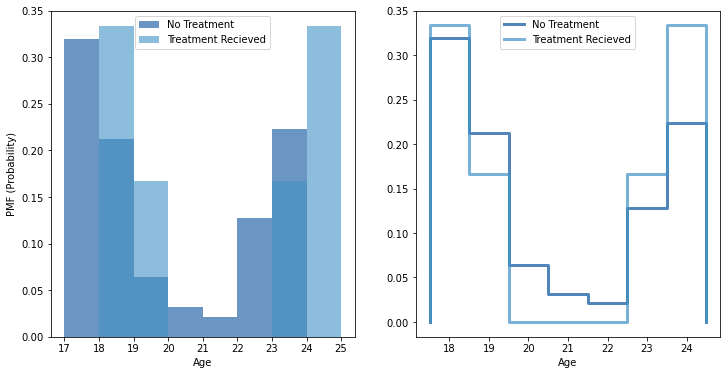

In [30]:
# Plot PMF
thinkplot.PrePlot(2, cols = 2)
thinkplot.Hist(notreatment_pmf, align = 'right', width = 1)
thinkplot.Hist(treatment_pmf, align = 'left', width = 1)
thinkplot.Config(xlabel = 'Age', ylabel = 'PMF (Probability)')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([notreatment_pmf, treatment_pmf], width = 1)
thinkplot.Config(xlabel = 'Age')

## CDF

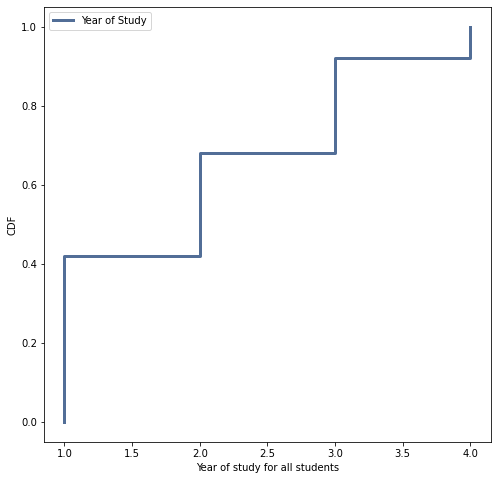

In [31]:
# CDF for Year of Study
sample = data['Year of Study']

# CDF function.
def EvalCDF(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

# Plot the CDF
cdf = thinkstats2.Cdf(sample, label = 'Year of Study')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel = 'Year of study for all students', ylabel = 'CDF', loc = 'upper left')

## Analytical Distribution

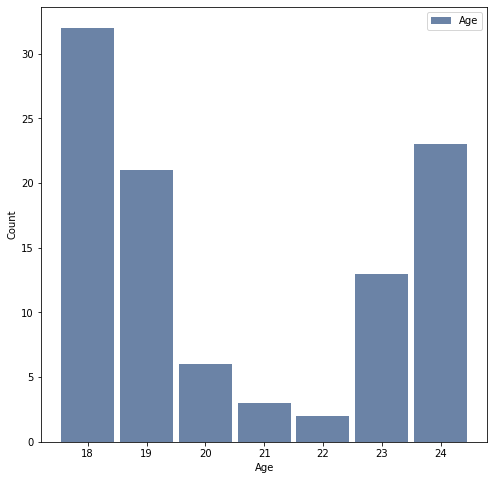

In [32]:
# Normal distribution of Age
age = data.Age
hist = thinkstats2.Hist(age, label = 'Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel = 'Age', ylabel = 'Count', loc = 'upper right')

Mean & Var: 20.520408163265305 6.106726364014994
Sigma: 2.4711791444601894


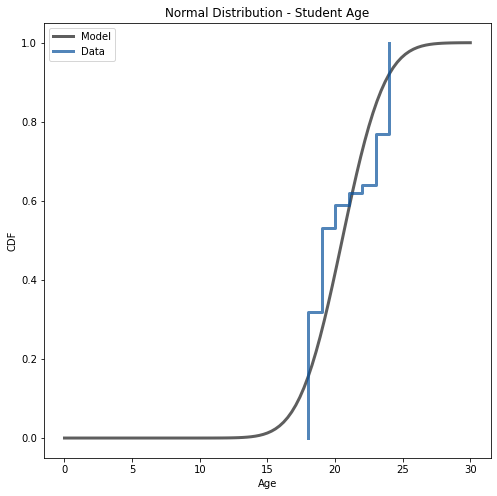

In [33]:
## Normal distribution for Age with CDF.
mu, var = thinkstats2.TrimmedMeanVar(age, p = 0.01)  
sigma = np.sqrt(var)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low = 0, high = 30)
thinkplot.Plot(xs, ps, label = 'Model', color = '.1')
cdf = thinkstats2.Cdf(age, label = 'Data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title = 'Normal Distribution - Student Age', xlabel = 'Age', ylabel = 'CDF', loc = 'upper left')

print('Mean & Var:', mu, var)
print('Sigma:', sigma)

## Scatter Plots

In [34]:
age = data.Age
anxiety = data.Anxiety
cgpa = data.CGPA

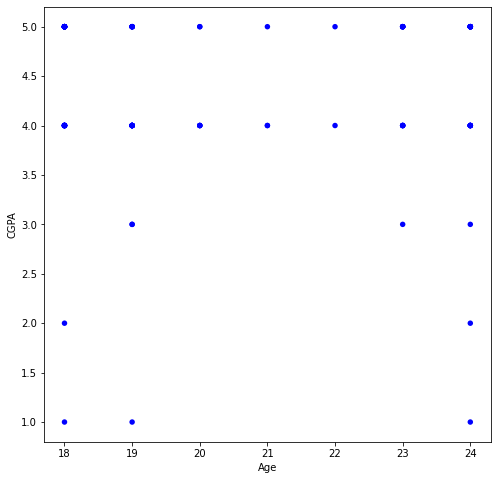

In [35]:
## Plot the first scatter plot.
thinkplot.Scatter(age, cgpa, alpha = 1)
thinkplot.Config(xlabel = 'Age',
                 ylabel = 'CGPA',
                 legend = False)

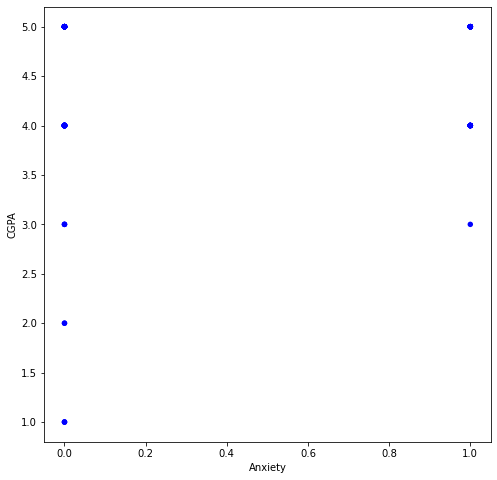

In [36]:
thinkplot.Scatter(anxiety, cgpa, alpha = 1)
thinkplot.Config(xlabel = 'Anxiety',
                 ylabel = 'CGPA',
                 legend = False)

In [37]:
# Covariance
np.cov(data.CGPA, data.Age)

array([[7.81717172e-01, 5.75757576e-03],
       [5.75757576e-03, 6.23141414e+00]])

In [38]:
# Covariance
np.cov(data.CGPA, data.Anxiety)

array([[0.78171717, 0.06525253],
       [0.06525253, 0.22666667]])

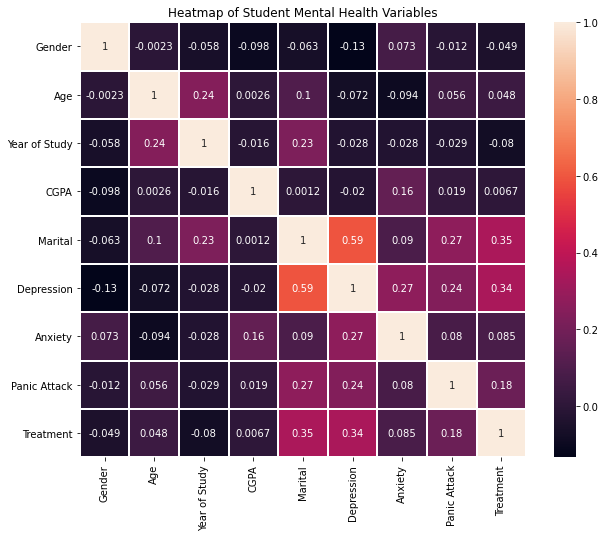

In [39]:
# Heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), linewidth = 1, linecolor = 'white', annot = True)
plt.title("Heatmap of Student Mental Health Variables")
plt.show()

## Hypothesis Testing

In [40]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys
    
data_cp = data.Treatment.values, data.CGPA.values
ht = CorrelationPermute(data_cp)
pvalue = ht.PValue()

In [41]:
ht.actual, ht.MaxTestStat()

(0.006701099404859582, 0.4240838623361152)

In [42]:
pvalue

0.994

## Regression Analysis

In [43]:
formula = 'CGPA ~ Treatment + Age'
model = sm.ols(formula, data = data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CGPA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                  0.002433
Date:                Sat, 04 Jun 2022   Prob (F-statistic):              0.998
Time:                        19:37:46   Log-Likelihood:                -129.08
No. Observations:                 100   AIC:                             264.2
Df Residuals:                      97   BIC:                             272.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2919      0.744      5.770      0.000       2.816       5.768
Treatment      0.0244      0.377      0.065      0.948      -0.723       0.772
Age            0.0008      0.036      0.023      0.982      -0.071       0.072
==============================================================================
Omnibus:                       50.603   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.488
Skew:                          -1.880   Prob(JB):                     1.40e-30
Kurtosis:                       7.342   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
formula = 'CGPA ~ Depression + Age'
model = sm.ols(formula, data = data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CGPA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.01998
Date:                Sat, 04 Jun 2022   Prob (F-statistic):              0.980
Time:                        19:37:46   Log-Likelihood:                -129.06
No. Observations:                 100   AIC:                             264.1
Df Residuals:                      97   BIC:                             271.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3146      0.753      5.730      0.000       2.820       5.809
Depression    -0.0372      0.188     -0.198      0.843      -0.410       0.335
Age            0.0004      0.036      0.011      0.991      -0.071       0.072
==============================================================================
Omnibus:                       51.481   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.271
Skew:                          -1.903   Prob(JB):                     7.74e-32
Kurtosis:                       7.460   Cond. No.                         175.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
formula = 'Treatment ~ Age'
model = sm.ols(formula, data = data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Treatment   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2245
Date:                Sat, 04 Jun 2022   Prob (F-statistic):              0.637
Time:                        19:37:46   Log-Likelihood:                 1.9849
No. Observations:                 100   AIC:                           0.03027
Df Residuals:                      98   BIC:                             5.241
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0338      0.200     -0.170      0.866      -0.430       0.362
Age            0.0046      0.010      0.474      0.637      -0.015       0.024
==============================================================================
Omnibus:                      102.006   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.682
Skew:                           3.693   Prob(JB):                    1.66e-173
Kurtosis:                      14.679   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""